In [10]:
# Basic module
import numpy as np
import pandas as pd

# Graphic module
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-Square module
from scipy.stats import chi2, chi2_contingency, pointbiserialr  # Not exist in basic anaconda. Install need(pip install scipy or conda install scipy)
from scipy.stats.contingency import association

## Summary

상관관계 및 컬럼 유사성을 기반으로 한 그룹화 레이블 컬럼 생성

컬럼 내 데이터가 3개 이상인 범주 데이터들에 대한 레이블 컬럼 - 해지 상관관계 확인

## Data loading
### Load

In [11]:
labeled_data = pd.read_csv("./result_data/labeling_data.csv", header=0, index_col=0, encoding='utf-8')

### Pre-processing


In [12]:
# Joined 상태 Stayed로 변경
labeled_data_cp = labeled_data.copy()

labeled_data_cp['Customer Status'][labeled_data_cp['Customer Status'] == 'Joined'] = 'Stayed'

C:\Users\La_Elya\AppData\Local\Temp\ipykernel_17356\2752292322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data_cp['Customer Status'][labeled_data_cp['Customer Status'] == 'Joined'] = 'Stayed'


In [23]:
# labeled_data_cp[['Payment Method', 'Paperless Billing']]

In [14]:
billing_columns = ['Payment Method', 'Paperless Billing']
internet_columns = ['Internet Type', 'Internet Service', 'Unlimited Data']

## Billing

In [24]:
category_dict = {'Bank Withdrawal':'BW', 'Credit Card':'CC', 'Mailed Check':'MC', 'Yes':'Y', 'No':'N'}
billing_df = pd.DataFrame(columns=['billing_category'])
target_df = labeled_data_cp[billing_columns]

for i in range(len(target_df)):
    ct = ''
    if target_df.loc[i]['Payment Method'] in category_dict.keys():
        ct += category_dict[target_df.loc[i]['Payment Method']]
    
    if target_df.loc[i]['Paperless Billing'] in category_dict.keys():
        ct += category_dict[target_df.loc[i]['Paperless Billing']]
    
    billing_df.loc[len(billing_df)] = ct

billing_df

,billing_category
0,BWY
1,CCY
2,BWY
3,BWY
4,BWY
...,...
7038,BWY
7039,MCY
7040,CCY
7041,BWY


In [18]:
billing_category_churned =  pd.concat([billing_df, labeled_data_cp['Customer Status']], axis=1)
# billing_category_churned

In [21]:
bcc_ct = pd.crosstab(billing_category_churned['billing_category'], billing_category_churned['Customer Status'])
bcc_ct['Total'] = bcc_ct['Churned'] + bcc_ct['Stayed']
bcc_ct['Churned_Percent'] = round(bcc_ct['Churned']/bcc_ct['Total']*100, 4)
bcc_ct.sort_values('Churned_Percent')
# 이렇게 계산하면, total이 늘어날 수록, 해지율을 떨어지는 이슈가 있다.

Customer Status,Churned,Stayed,Total,Churned_Percent
billing_category,,,,
CCN,135,1256,1391,9.7052
CCY,263,1095,1358,19.3667
BWN,276,1000,1276,21.6301
MCN,58,147,205,28.2927
BWY,1053,1580,2633,39.9924
MCY,84,96,180,46.6667


<Axes: xlabel='billing_category', ylabel='Churned_Percent'>

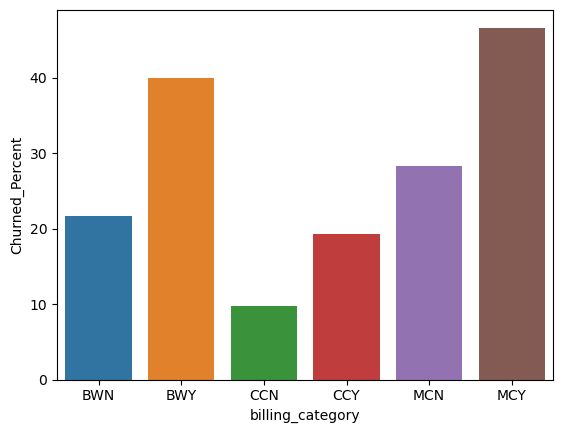

In [22]:
sns.barplot(bcc_ct, x=bcc_ct.index, y='Churned_Percent')

In [33]:
test_ctdf = pd.crosstab(billing_category_churned['billing_category'], billing_category_churned['Customer Status'])
rows = [row.to_list() for i, row in test_ctdf.iterrows()]
association(rows, method="cramer")

0.2758649050481174

## Internet

In [26]:
labeled_data_cp[internet_columns].value_counts()

Internet Type  Internet Service  Unlimited Data
Fiber Optic    Yes               Yes               2616
None           No                No                1526
DSL            Yes               Yes               1414
Cable          Yes               Yes                715
Fiber Optic    Yes               No                 419
DSL            Yes               No                 238
Cable          Yes               No                 115
dtype: int64

In [27]:
category_dict = {'Fiber Optic':'FO', 'DSL':'DS', 'Cable':'CB', 'Yes':'Y', 'No':'N', "None":"Na"}
internet_df = pd.DataFrame(columns=['internet_category'])
target_df = labeled_data_cp[internet_columns]

for i in range(len(target_df)):
    ct = ''
    if target_df.loc[i]['Internet Type'] in category_dict.keys():
        ct += category_dict[target_df.loc[i]['Internet Type']]
    
    if target_df.loc[i]['Internet Service'] in category_dict.keys():
        ct += category_dict[target_df.loc[i]['Internet Service']]
    
    if target_df.loc[i]['Unlimited Data'] in category_dict.keys():
        ct += category_dict[target_df.loc[i]['Unlimited Data']]
    
    internet_df.loc[len(internet_df)] = ct

internet_df

,internet_category
0,DSYN
1,FOYY
2,FOYY
3,FOYY
4,FOYY
...,...
7038,NaNN
7039,CBYY
7040,FOYY
7041,DSYY


In [28]:
internet_category_churned =  pd.concat([internet_df, labeled_data_cp['Customer Status']], axis=1)
# billing_category_churned

In [31]:
icc_ct = pd.crosstab(internet_category_churned['internet_category'], internet_category_churned['Customer Status'])
icc_ct['Total'] = icc_ct['Churned'] + icc_ct['Stayed']
icc_ct['Churned_Percent'] = round(icc_ct['Churned']/icc_ct['Total']*100, 4)
icc_ct.sort_values('Churned_Percent')
# 이렇게 계산하면, total이 늘어날 수록, 해지율을 떨어지는 이슈가 있다.

Customer Status,Churned,Stayed,Total,Churned_Percent
internet_category,,,,
NaNN,113,1413,1526,7.4050
DSYY,260,1154,1414,18.3876
DSYN,47,191,238,19.7479
CBYY,174,541,715,24.3357
CBYN,39,76,115,33.9130
FOYN,168,251,419,40.0955
FOYY,1068,1548,2616,40.8257


<Axes: xlabel='internet_category', ylabel='Churned_Percent'>

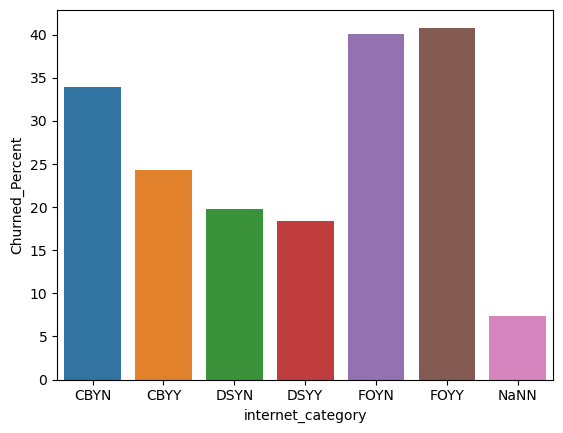

In [32]:
sns.barplot(icc_ct, x=icc_ct.index, y='Churned_Percent')

In [34]:
test_ctdf = pd.crosstab(internet_category_churned['internet_category'], internet_category_churned['Customer Status'])
rows = [row.to_list() for i, row in test_ctdf.iterrows()]
association(rows, method="cramer")

0.3058391977770261